In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv('iphone_purchase_records.csv')
df.head()


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [28]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [29]:
df['Purchase Iphone'].value_counts()


Purchase Iphone
0    257
1    143
Name: count, dtype: int64

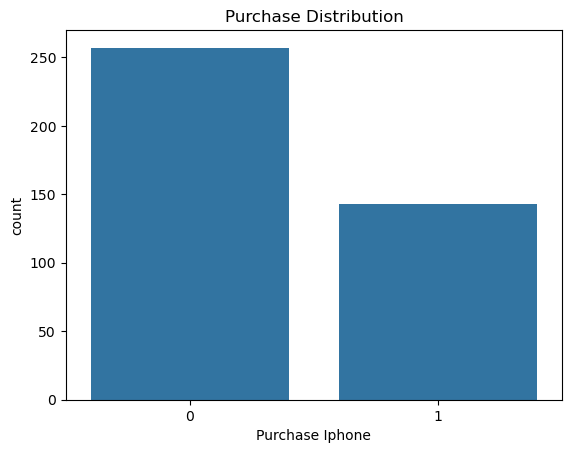

In [30]:
sns.countplot(x='Purchase Iphone', data=df)
plt.title('Purchase Distribution')
plt.show()


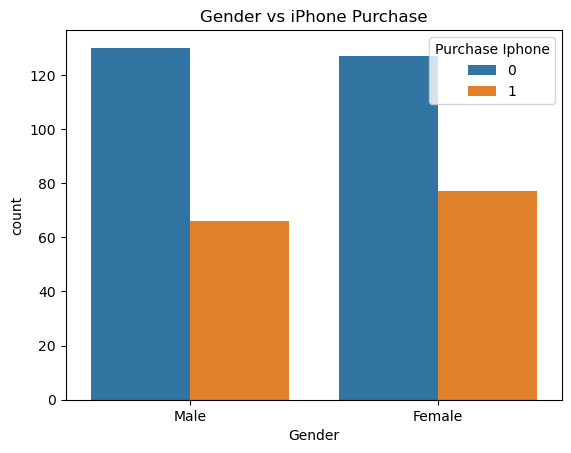

In [31]:
sns.countplot(x='Gender', hue='Purchase Iphone', data=df)
plt.title('Gender vs iPhone Purchase')
plt.show()


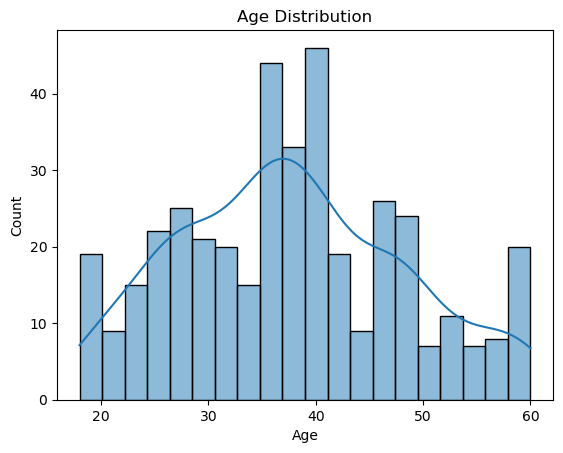

In [32]:
# Age Distribution

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


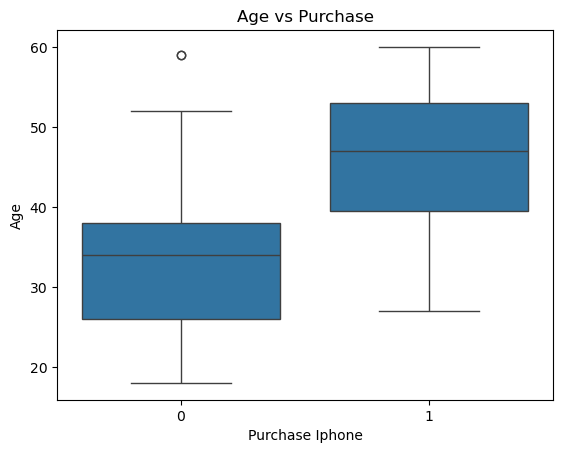

In [33]:
sns.boxplot(x='Purchase Iphone', y='Age', data=df)
plt.title('Age vs Purchase')
plt.show()


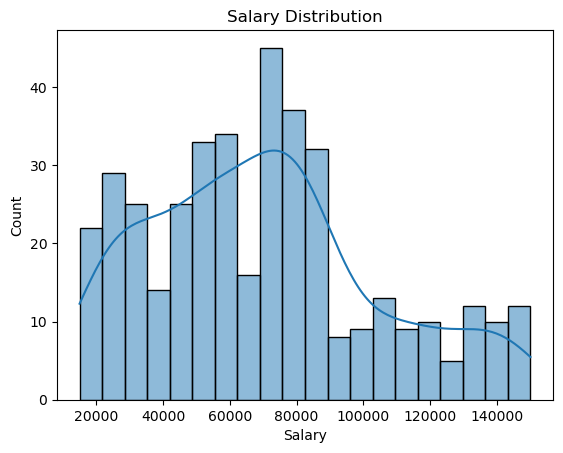

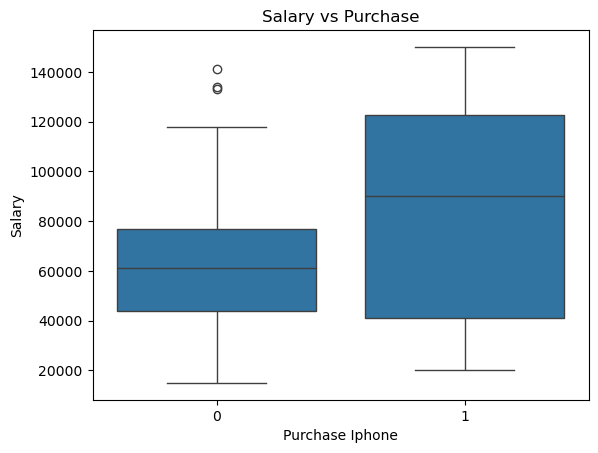

In [34]:
# Salary Distribution

sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.show()

sns.boxplot(x='Purchase Iphone', y='Salary', data=df)
plt.title('Salary vs Purchase')
plt.show()


In [35]:
# Data Processing

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
X = df[['Gender', 'Age', 'Salary']]
y = df['Purchase Iphone']


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [39]:
# Model Evaluation

y_pred = dt_model.predict(X_test)


In [40]:
# Accuracy Score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.84

In [41]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[56,  7],
       [ 9, 28]])

In [42]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



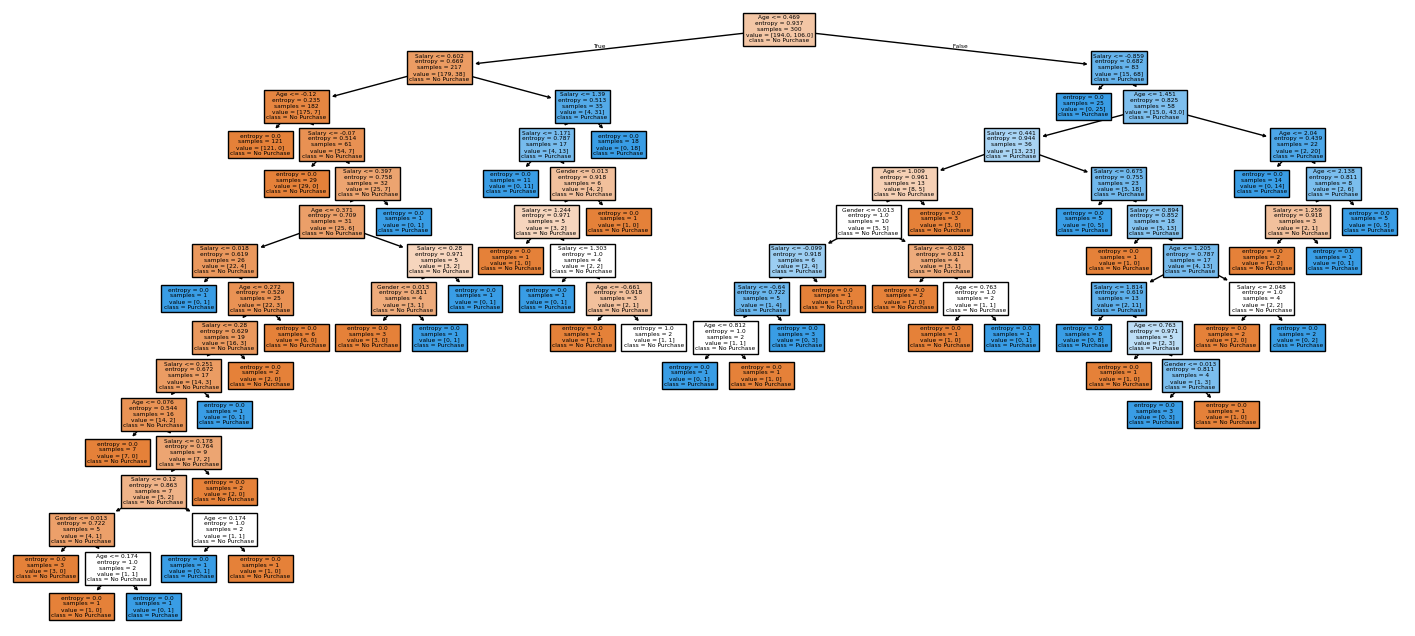

In [43]:
# Decision Tree Visualization

from sklearn.tree import plot_tree

plt.figure(figsize=(18,8))
plot_tree(
    dt_model,
    feature_names=['Gender', 'Age', 'Salary'],
    class_names=['No Purchase', 'Purchase'],
    filled=True
)
plt.show()


Decision Tree successfully predicts iPhone purchase behavior

Age and Salary are the most influential features

The model is interpretable and suitable for business decision-making